Load the Data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('output.csv')

# Display the first few rows of the dataframe
df.head()


,frame_number,person_1_center_x,person_1_center_y,person_1_velocity,person_1_intersection,person_2_center_x,person_2_center_y,person_2_velocity,person_2_intersection,person_3_center_x,...,vehicle_2_velocity,vehicle_2_intersection,vehicle_3_center_x,vehicle_3_center_y,vehicle_3_velocity,vehicle_3_intersection,vehicle_4_center_x,vehicle_4_center_y,vehicle_4_velocity,vehicle_4_intersection
0,34.0,596.67566,766.2973,5.179938,120,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
1,36.0,589.50000,774.8750,6.523378,278,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
2,37.0,587.08700,762.1957,12.906893,283,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
3,38.0,581.50000,778.7500,17.471687,263,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
4,39.0,576.00000,766.5750,13.359653,120,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0


Preprocess the Data

In [5]:
# Check for non-numeric columns and convert them or drop
# df = df.apply(pd.to_numeric, errors='coerce')  # Example to convert to numeric, coerce errors

# Drop or fill missing values
# df.dropna(inplace=True)  # Or df.fillna(method='ffill', inplace=True)

# Exclude the 'Violation status' column
# df_features = df.drop('Violation status', axis=1)
df_features = df
df

,frame_number,person_1_center_x,person_1_center_y,person_1_velocity,person_1_intersection,person_2_center_x,person_2_center_y,person_2_velocity,person_2_intersection,person_3_center_x,...,vehicle_2_velocity,vehicle_2_intersection,vehicle_3_center_x,vehicle_3_center_y,vehicle_3_velocity,vehicle_3_intersection,vehicle_4_center_x,vehicle_4_center_y,vehicle_4_velocity,vehicle_4_intersection
0,34.0,596.67566,766.2973,5.179938,120,0.0,0.0,0.0,0,0.0,...,0.000000,0,0.00000,0.00000,0.000000,0,0,0,0,0
1,36.0,589.50000,774.8750,6.523378,278,0.0,0.0,0.0,0,0.0,...,0.000000,0,0.00000,0.00000,0.000000,0,0,0,0,0
2,37.0,587.08700,762.1957,12.906893,283,0.0,0.0,0.0,0,0.0,...,0.000000,0,0.00000,0.00000,0.000000,0,0,0,0,0
3,38.0,581.50000,778.7500,17.471687,263,0.0,0.0,0.0,0,0.0,...,0.000000,0,0.00000,0.00000,0.000000,0,0,0,0,0
4,39.0,576.00000,766.5750,13.359653,120,0.0,0.0,0.0,0,0.0,...,0.000000,0,0.00000,0.00000,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,501.0,509.66666,830.6190,9.596604,578,0.0,0.0,0.0,0,0.0,...,2.871707,1534,1055.06420,893.20184,9.567101,15395,0,0,0,0
403,502.0,520.77050,847.6229,20.308332,329,0.0,0.0,0.0,0,0.0,...,15.509144,1534,1077.05090,893.77120,21.994064,15401,0,0,0,0
404,588.0,824.53330,743.0000,10.274761,36,0.0,0.0,0.0,0,0.0,...,10.934697,2682,846.06976,788.16280,21.011045,2026,0,0,0,0
405,590.0,838.88574,751.2857,4.993969,6,0.0,0.0,0.0,0,0.0,...,10.835358,4086,857.27420,800.22580,7.478364,2963,0,0,0,0


Standardize the Data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)


In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)  # Adjust the number of components

# Fit and transform the scaled data
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


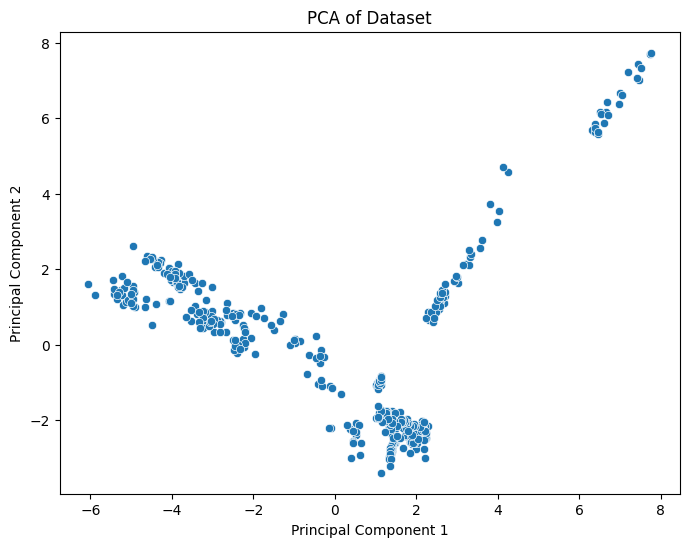

In [9]:
import seaborn as sns

# Visualize the first two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


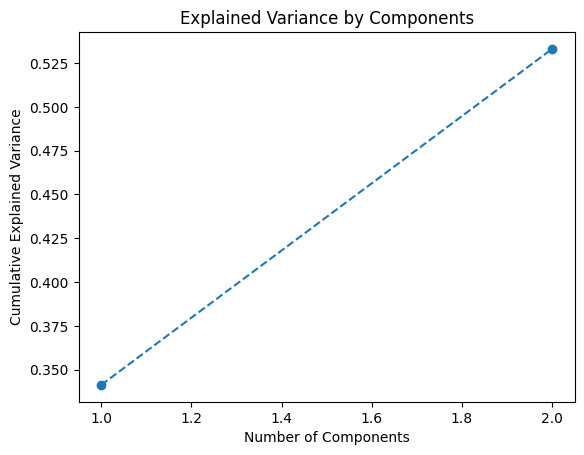

In [10]:
plt.figure()
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
